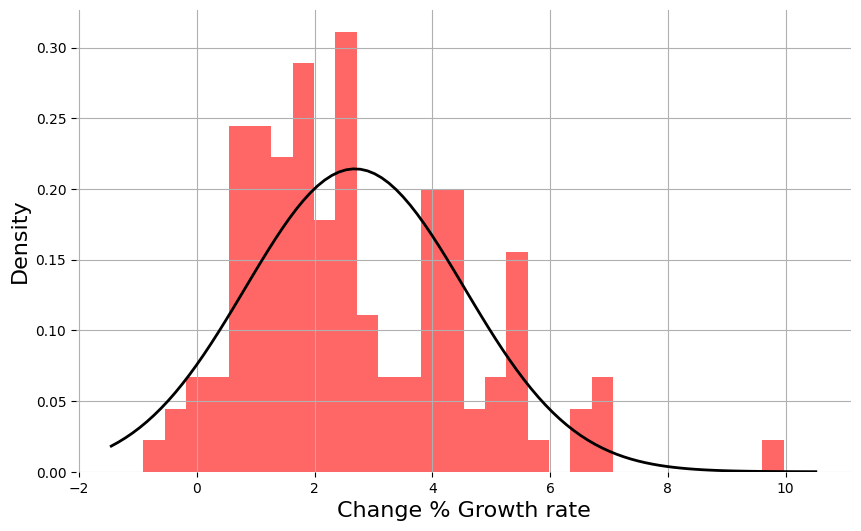

Shapiro-Wilk Test: Stat=0.951, p-value=0.000


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

growth_rates = np.array([
    -0.19, -0.27, -0.91, 0.17, 0.00, 0.25, 0.48, 0.63, 0.82, 0.87,
    0.81, 0.82, 0.85, 0.97, 0.97, 0.98, 0.64, 0.54, 0.71, 0.91,
    1.09, 1.14, 1.45, 2.54, 1.41, 1.44, 1.37, 0.91, 0.56, 0.55,
    0.88, 1.52, 1.55, 2.51, 2.65, 2.47, 2.49, 2.50, 2.31, 1.91,
    2.18, 2.20, 2.04, 2.34, 1.84, 2.16, 1.90, 1.85, 1.72, 1.46,
    1.38, 1.18, 1.88, 1.32, 1.63, 1.14, 1.69, 1.47, 2.39, 2.73,
    3.49, 3.49, 3.95, 2.61, 3.94, 4.32, 4.02, 4.42, 3.04, 4.04,
    5.29, 4.50, 4.28, 3.29, 2.71, 2.36, 2.86, 2.30, 4.46, 5.16,
    9.97, 6.88, 4.13, 2.43, 1.94, 1.96, 2.95, 2.69, 1.90, 1.63,
    1.17, 1.20, 1.98, 3.25, 3.50, 3.83, 4.42, 4.21, 4.16, 6.35,
    6.99, 5.16, 6.78, 6.44, 2.36, 2.87, 3.26, 2.09, 2.52, 4.38,
    5.36, 5.29, 5.32, 5.43, 5.60, 5.21, 3.95, 4.38, 5.64, 5.29,
    4.87, 4.71, 4.03, 0.00
]) 


plt.figure(figsize=(10, 6))
data_mean, data_std = norm.fit(growth_rates)
plt.hist(growth_rates, bins=30, density=True, alpha=0.6, color='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, data_mean, data_std)

plt.ylabel("Density", fontsize=16)
plt.xlabel("Change % Growth rate", fontsize=16)
plt.plot(x, p, 'k', linewidth=2)
plt.grid(True)
ax = plt.gca()  
ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)   
ax.spines['bottom'].set_visible(False) 
plt.show()


stat, p_value = shapiro(growth_rates)
print("Shapiro-Wilk Test: Stat=%.3f, p-value=%.3f" % (stat, p_value))


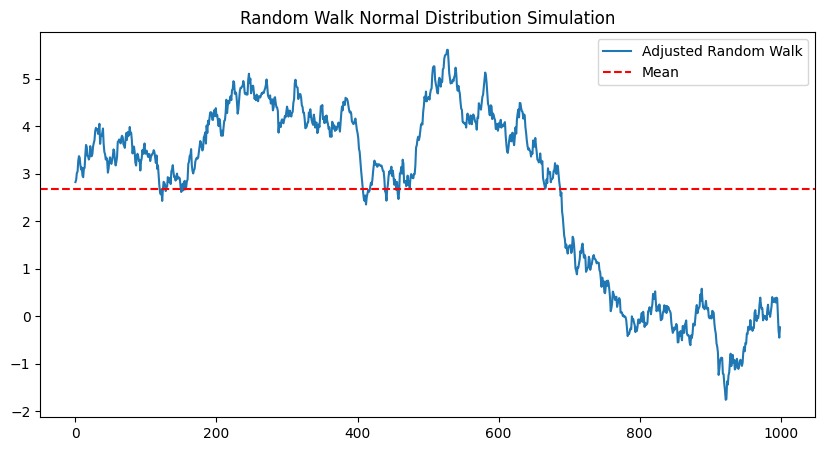

Final Mean: 2.68
Final Std Dev: 1.86


In [20]:
import numpy as np
import matplotlib.pyplot as plt


mean = 2.68
std = 1.86
num_steps = 1000


initial_value = mean

# 步长服从N(0, std)
steps = np.random.normal(0, std, num_steps)


random_walk = np.cumsum(steps) + initial_value


random_walk_mean = np.mean(random_walk)
random_walk_std = np.std(random_walk)
adjusted_random_walk = (random_walk - random_walk_mean) / random_walk_std * std + mean


plt.figure(figsize=(10, 5))
plt.plot(adjusted_random_walk, label='Adjusted Random Walk')
plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.title('Random Walk Normal Distribution Simulation')
plt.legend()
plt.show()

print("Final Mean:", np.mean(adjusted_random_walk))
print("Final Std Dev:", np.std(adjusted_random_walk))

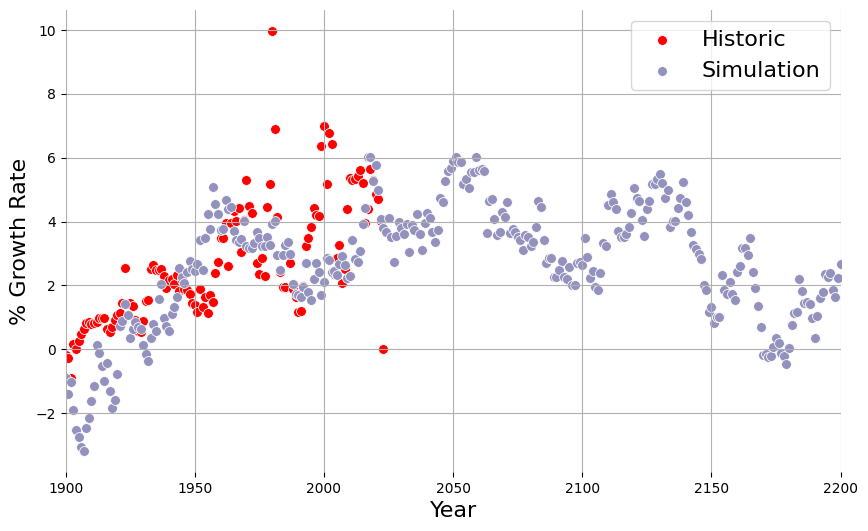

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假定你已经有真实数据的 'growth_rates' 对应于1900-2023年
years = np.arange(1900, 2024)
forecast_years = np.arange(2024, 2201)  # 预测的年份从2024至2200

# 生成随机游走初始部分数据
mean = 2.68
std = 1.86
initial_value = mean
steps = np.random.normal(0, std, len(years))
random_walk = np.cumsum(steps) + initial_value

# 生成随机游走预测部分数据
forecast_steps = np.random.normal(0, std, len(forecast_years))
forecast_random_walk = np.cumsum(forecast_steps) + random_walk[-1]

# 合并随机游走的初始和预测部分
extended_random_walk = np.concatenate((random_walk, forecast_random_walk))

# 标准化处理仿真数据
random_walk_mean = np.mean(extended_random_walk)
random_walk_std = np.std(extended_random_walk)
adjusted_random_walk = (extended_random_walk - random_walk_mean) / random_walk_std * std + mean

# 合并年份
extended_years = np.concatenate((years, forecast_years))

# 整理数据为 DataFrame
df_real = pd.DataFrame({'Year': years, 'Growth Rate': growth_rates})
df_random_walk = pd.DataFrame({'Year': extended_years, 'Random Walk': adjusted_random_walk})

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_real, x='Year', y='Growth Rate', color='red', label='Historic', s=50)  # 只画历史真实数据
sns.scatterplot(data=df_random_walk, x='Year', y='Random Walk', color='#9392BE', label='Simulation', s=50)  # 同时画历史与预测数据

plt.xlabel('Year', fontsize=16)
plt.ylabel('% Growth Rate', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
ax = plt.gca()  
ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)   
ax.spines['bottom'].set_visible(False) 
plt.xlim(1900, 2200)  # 设置x轴的范围
plt.show()

Real Data: mean=2.68, std=1.87
Simulated Data: mean=2.68, std=1.86


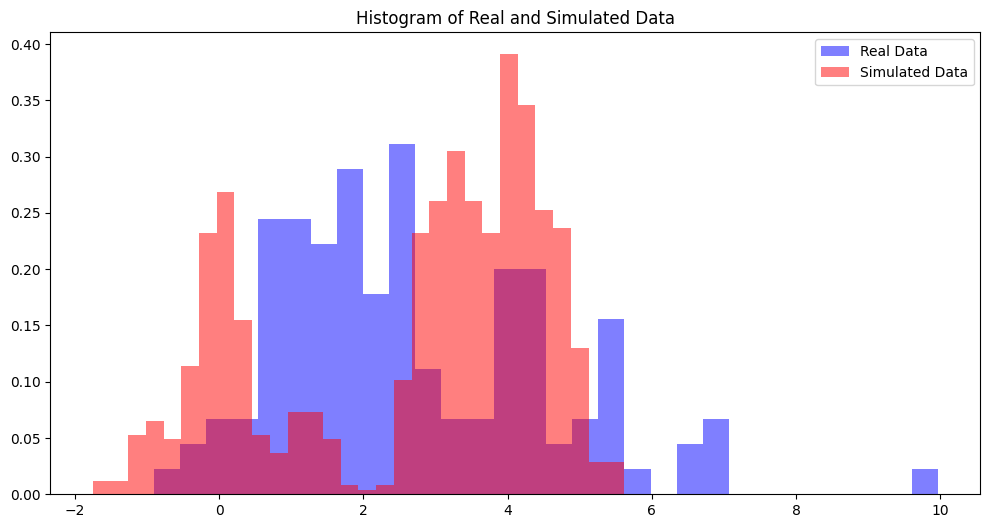

Shapiro-Wilk Test Real Data: Statistics=0.951, p=0.000
Shapiro-Wilk Test Simulated Data: Statistics=0.885, p=0.000


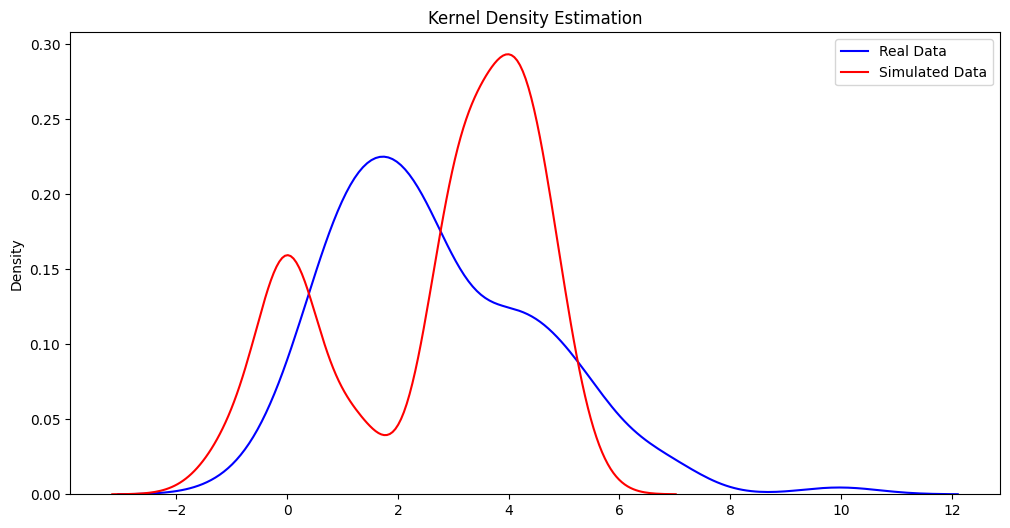

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, describe, norm



# 基本统计量
stats_real = describe(growth_rates)
stats_simulated = describe(adjusted_random_walk)
print(f'Real Data: mean={stats_real.mean:.2f}, std={np.sqrt(stats_real.variance):.2f}')
print(f'Simulated Data: mean={stats_simulated.mean:.2f}, std={np.sqrt(stats_simulated.variance):.2f}')

# 绘制直方图进行视觉比较
plt.figure(figsize=(12, 6))
plt.hist(growth_rates, bins=30, alpha=0.5, label='Real Data', color='b', density=True)
plt.hist(adjusted_random_walk, bins=30, alpha=0.5, label='Simulated Data', color='r', density=True)
plt.legend()
plt.title("Histogram of Real and Simulated Data")
plt.show()

# 正态性检验
stat_r, p_r = shapiro(growth_rates)
stat_s, p_s = shapiro(adjusted_random_walk)
print("Shapiro-Wilk Test Real Data: Statistics=%.3f, p=%.3f" % (stat_r, p_r))
print("Shapiro-Wilk Test Simulated Data: Statistics=%.3f, p=%.3f" % (stat_s, p_s))

# 核密度估计
plt.figure(figsize=(12, 6))
sns.kdeplot(growth_rates, label="Real Data", color='b')
sns.kdeplot(adjusted_random_walk, label="Simulated Data", color='r')
plt.legend()
plt.title("Kernel Density Estimation")
plt.show()